In [1]:
import os
import cv2
import glob
import time
import random
import shutil #拷贝文件
import numpy as np
import mpl_toolkits
import imgaug as ia
import pandas as pd
from progressbar import * #进度条
from natsort import natsorted
import matplotlib.pyplot as plt
from skimage import io,transform
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from skimage.io import imread, imsave

In [2]:
'''
训练数据按类型分类
'''
def split_data_as_class(data_path='data', new_data_floder = 'data/train_classes'):  
    files = glob.glob(data_path + '/train/*')
    labels = pd.read_csv(data_path + '/train.csv')
    total = len(files)
    pbar = ProgressBar().start()
    for i, file_path in enumerate(files):
        pbar.update(int((i / (total - 1)) * 100))#进度条
        time.sleep(0.01)
        
        img =  file_path.split('/')[-1]
        Id = labels[labels.Image == img].Id.tolist()[0]
        new_floder = new_data_floder + '/' + Id
        if not os.path.exists(new_floder):
            os.makedirs(new_floder)
        new_file_path = new_floder + '/' + file_path.split("/")[-1]
        shutil.copyfile(file_path, new_file_path)
    pbar.finish()
    #print('Finish!')

In [3]:
split_data_as_class()

100% |########################################################################|


In [2]:
train_csv = pd.read_csv("data/train.csv")
print(train_csv.head())
print(train_csv.shape)
print(len(train_csv['Id'].unique().tolist()))

           Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale
(25361, 2)
5005


In [3]:
print(train_csv.groupby('Id').count().sort_values(['Image'], ascending=False))

           Image
Id              
new_whale   9664
w_23a388d     73
w_9b5109b     65
w_9c506f6     62
w_0369a5c     61
w_700ebb4     57
w_3de579a     54
w_564a34b     51
w_fd3e556     50
w_88e4537     49
w_2b069ba     48
w_d405854     47
w_789c969     45
w_f0fe284     45
w_5e8e218     40
w_778e474     40
w_343f088     40
w_5a2634c     37
w_a9304b9     37
w_60ce6fc     37
w_6822dbc     36
w_af367c3     35
w_1ca9ab1     34
w_f765256     34
w_17b0d3a     33
w_d72771c     32
w_8c25681     31
w_08630fd     31
w_6cda039     31
w_51fc1fc     30
...          ...
w_ad01432      1
w_491bdcb      1
w_ad2bb89      1
w_48cc590      1
w_4982a49      1
w_ad6df15      1
w_ad7b758      1
w_ad880b8      1
w_48b6083      1
w_48b1730      1
w_adcaf2a      1
w_497efb9      1
w_49ae16f      1
w_abd9d0b      1
w_4a1b777      1
w_abeab1e      1
w_abee142      1
w_4ac8e76      1
w_4ab6b16      1
w_4a8467f      1
w_ac26398      1
w_ac608c7      1
w_49cd60d      1
w_ac6aee2      1
w_ac73445      1
w_49ee8e0     

In [5]:
temp_df = train_csv.groupby('Id').count()
#temp_df_subset = temp_df[temp_df.Image == 1]
temp_df_subset = temp_df[temp_df.Image >= 30]
print(temp_df_subset.shape)

(32, 1)


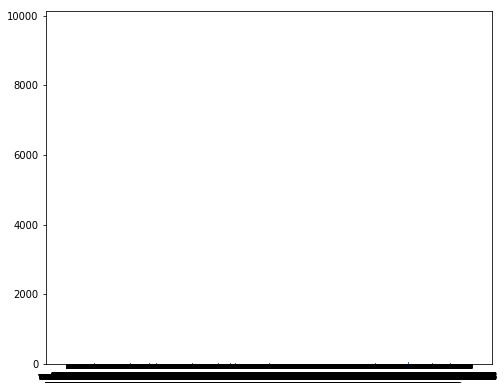

In [5]:
'''
原始数据分析
'''
### 数目统计
floders = natsorted(glob.glob('data/train_classes/*'))
classes = []
file_num = []
for i, floder in enumerate(floders):
    floder_name = floder.split("/")[-1]
    classes.append(floder_name)
    file_num.append(len(glob.glob(floder + '/*')))
#print(classes)
plt.figure(figsize=(8, 3.5))
plt.bar(range(len(file_num)), file_num, tick_label=classes)
plt.show()

In [11]:
print(len(file_num))

5005


In [ ]:
### 数据可视化 ###
plt.figure(figsize=(11, 10))
num_classes = len(classes)
sample_pre_class = 10

min_area = 10000
min_rows = 0
min_cols = 0
max_area = 0
max_rows = 0
max_cols = 0
number = 0
for i, floder in enumerate(floders):
    files = glob.glob(floder + '/*')
    number += len(files)
    samples = random.sample(files, sample_pre_class)
    for idx, file in enumerate(samples):
        img = imread(file)
        #计算大小
        rows, cols = img.shape[0], img.shape[1]
        if cols * rows < min_area:
            min_rows = rows
            min_cols = cols
        if cols * rows > max_area:
            max_rows = rows
            max_cols = cols
        dst = transform.resize(img, (244, 244))
        plt_idx = i * (sample_pre_class+1) + idx + 1
        #print(i, idx, plt_idx)
        plt.subplot(num_classes, sample_pre_class+1, plt_idx)

        plt.imshow(dst)
        plt.axis('off')
        if idx == sample_pre_class-1:
            plt.subplot(num_classes, sample_pre_class+1, plt_idx+1)
            floder_name = floder.split("/")[-1]
            plt.text(0.5, 0.5, floder_name,size=15,  verticalalignment='center')
            plt.axis('off')
plt.show()  
print('训练数据总数为:%d, 图片最大的尺寸为：(%d, %d), 最小的尺寸为: (%d, %d)' %(number, max_cols, max_rows, min_cols, min_rows))